https://scikit-network.readthedocs.io/en/latest/tutorials/ranking/index.html

In [2]:
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_bigraph

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position


In [4]:
# PageRank
pagerank = PageRank()
scores = pagerank.fit_predict(adjacency)

In [5]:
image = visualize_graph(adjacency, position, scores=np.log(scores))
SVG(image)

https://networkx.org/documentation/stable/tutorial.html

Page rank value: {'A': 0.4080745143467559, 'B': 0.07967426232810562, 'C': 0.13704946318948705, 'D': 0.13704946318948705, 'E': 0.021428571428571432, 'F': 0.07967426232810562, 'G': 0.13704946318948705}


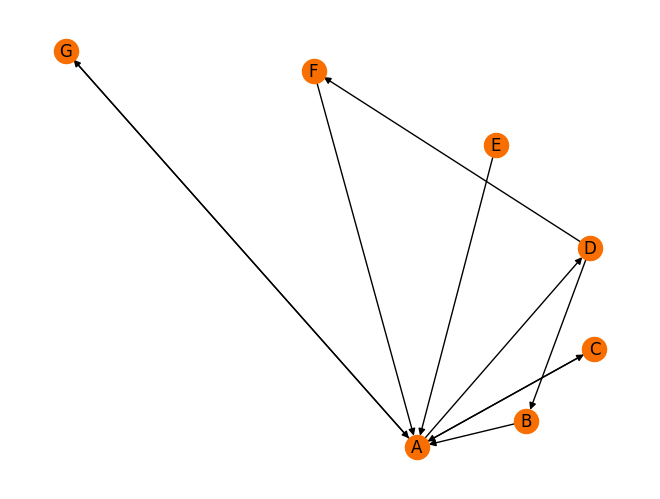

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

[G.add_node(k) for k in ["A", "B", "C", "D", "E", "F", "G"]]

G.add_edges_from([('G','A'), ('A','G'),('B','A'),
                  ('C','A'),('A','C'),('A','D'),
                  ('E','A'),('F','A'),('D','B'),
                  ('D','F')])
ppr1 = nx.pagerank(G)

print(f"Page rank value: { ppr1}")
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

In [ ]:
! pip install pyspark

In [6]:
# from graphframes import *
import networkx as nx
from pyvis.network import Network
from IPython.display import HTML

import pandas as pd

# Create a Pandas DataFrame
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# Display the DataFrame
print(edges)


   src  dst
0  ID1  ID3
1  ID1  ID5
2  ID2  ID1
3  ID2  ID3
4  ID2  ID4
5  ID2  ID5
6  ID3  ID2
7  ID4  ID3
8  ID5  ID2
9  ID5  ID3


In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define your edge list using Pandas
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# Step 2: Create a MultiDiGraph using NetworkX
G = nx.MultiDiGraph()
G.add_edges_from(edges.itertuples(index=False, name=None))  # Add edges directly

# Step 3: Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, connectionstyle='arc3, rad = 0.1', node_color='lightblue', edge_color='gray')
plt.title("Directed Multigraph from Pandas Edge List")
plt.show()


In [18]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML

#Not: jupyter de randerlamıyor html kaydedip bak

# 1. Create edges DataFrame
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# 2. Create a MultiDiGraph and add edges
G = nx.MultiDiGraph()
G.add_edges_from(edges.itertuples(index=False, name=None))

# 3. Use pyvis to visualize
nt = Network(notebook=True, directed=True, cdn_resources='remote')
nt.from_nx(G)  # Load the NetworkX graph
nt.show_buttons(filter_=['physics'])  # Optional: show physics controls
nt.show("graph.html")  # Saves and displays in Jupyter notebook


graph.html


# pagerank mac deneme

In [2]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add weighted pass edges (From, To, Weight)
passes = [
    ('A', 'B', 5),
    ('A', 'C', 2),
    ('B', 'C', 3),
    ('B', 'D', 1),
    ('C', 'A', 4),
    ('D', 'B', 1)
]

G.add_weighted_edges_from(passes)

# Compute weighted PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85, weight='weight')

# Print results
for player, score in pagerank_scores.items():
    print(f"Player {player}: PageRank = {score:.4f}")


Player A: PageRank = 0.2940
Player B: PageRank = 0.3025
Player C: PageRank = 0.3017
Player D: PageRank = 0.1018


In [8]:
from statsbombpy import sb
import pandas as pd

# Retrieve list of available competitions
competitions = sb.competitions()
print(competitions[['competition_id', 'season_id', 'competition_name', 'season_name']])

# Select a specific competition and season
# For example, FIFA World Cup 2018
competition_id = 43
season_id = 3

# Retrieve matches for the selected competition and season
matches = sb.matches(competition_id=competition_id, season_id=season_id)
print(matches[['match_id', 'home_team', 'away_team', 'match_date']])

# Select a specific match by match_id
# For example, the final match: France vs Croatia
match_id = 8658

# Retrieve event data for the selected match
events = sb.events(match_id=match_id)

import networkx as nx

# Filter for completed pass events
passes = events[(events['type'] == 'Pass') & (events['pass_outcome'].isnull()) & (events['team']=='Croatia') ]

# Step 1: Get list of players who started the match
starting = events[events['type'] == 'Starting XI']
starting_players = []

for _, row in starting.iterrows():
    for player in row['tactics']['lineup']:
        starting_players.append({
            'player_id': player['player']['id'],
            'player_name': player['player']['name'],
        })

starting_df = pd.DataFrame(starting_players)

passes = passes[(passes['player'].isin(starting_df['player_name'])) & (passes['pass_recipient'].isin(starting_df['player_name']))]

# Initialize a directed graph
G = nx.DiGraph()

# Iterate through pass events to build the graph
for _, row in passes.iterrows():
    passer = row['player']
    recipient = row['pass_recipient'] if pd.notnull(row['pass_recipient']) else None
    if recipient:
        if G.has_edge(passer, recipient):
            G[passer][recipient]['weight'] += 1
        else:
            G.add_edge(passer, recipient, weight=1)



    competition_id  season_id        competition_name season_name
0                9        281           1. Bundesliga   2023/2024
1                9         27           1. Bundesliga   2015/2016
2             1267        107  African Cup of Nations        2023
3               16          4        Champions League   2018/2019
4               16          1        Champions League   2017/2018
..             ...        ...                     ...         ...
69              55         43               UEFA Euro        2020
70              35         75      UEFA Europa League   1988/1989
71              53        106       UEFA Women's Euro        2022
72              72        107       Women's World Cup        2023
73              72         30       Women's World Cup        2019

[74 rows x 4 columns]
    match_id     home_team    away_team  match_date
0       7585      Colombia      England  2018-07-03
1       7570       England      Belgium  2018-06-28
2       7586        Sweden  S

C:\Users\user\AppData\Local\Temp\ipykernel_14456\3659003059.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_events[['x', 'y']] = pd.DataFrame(location_events['location'].tolist(), index=location_events.index)
C:\Users\user\AppData\Local\Temp\ipykernel_14456\3659003059.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_events[['x', 'y']] = pd.DataFrame(location_events['location'].tolist(), index=location_events.index)


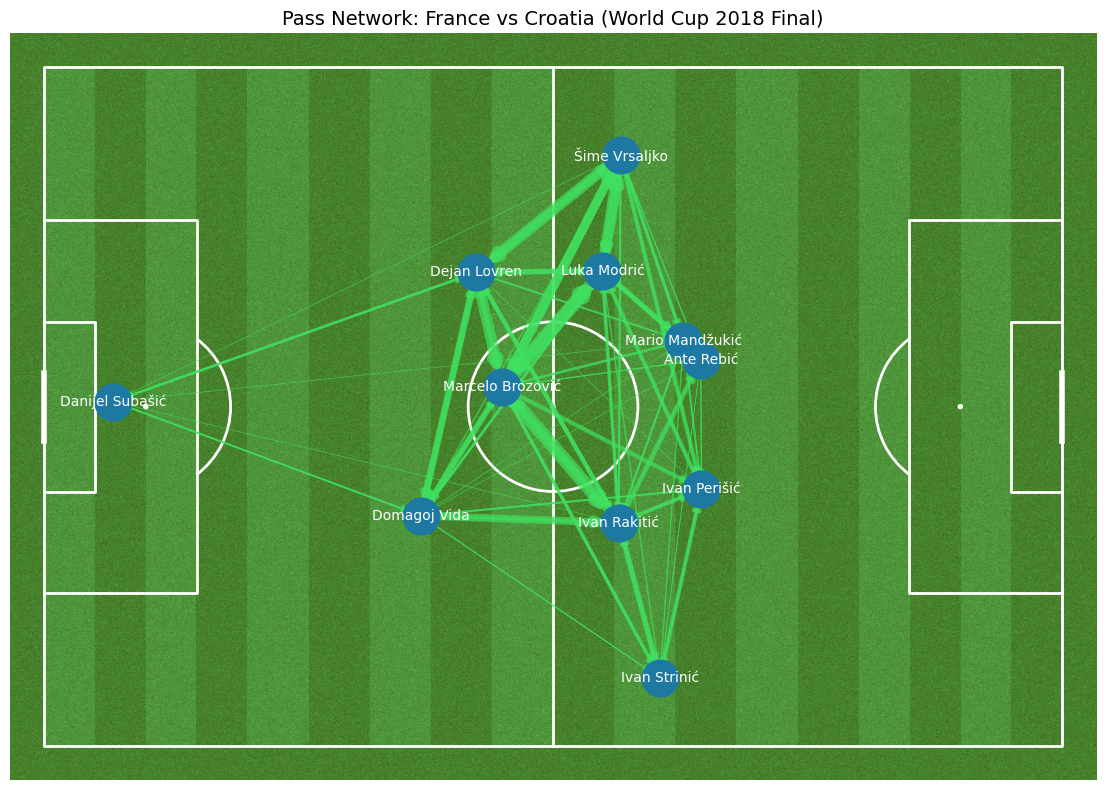

In [9]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch


# Create pitch (StatsBomb dimensions: 120x80)
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe = True)
fig, ax = pitch.draw(figsize=(12, 8))
# Set up the figure
# plt.figure(figsize=(12, 8))

# Step 2: Filter events with location data (e.g., Passes, Carries)
location_events = events[events['location'].notnull()]

# Step 3: Expand location into x, y
location_events[['x', 'y']] = pd.DataFrame(location_events['location'].tolist(), index=location_events.index)

# Step 4: Group by player and team, compute average position
avg_positions = location_events.groupby(['player', 'team'])[['x', 'y']].mean().reset_index()

# Optional: Rename for clarity
avg_positions.columns = ['Player', 'Team', 'Avg X', 'Avg Y']

# Step 1: Create pos dict from avg_positions
# Optional: Flip Y-axis (to match TV view orientation if needed)
pos = {
    row['Player']: (row['Avg X'], 80 - row['Avg Y'])  # flipping y-axis for better visual
    for _, row in avg_positions.iterrows()
    if row['Player'] in G.nodes  # ensure player is in the graph
}

# Step 2: Plot using avg positions
# plt.figure(figsize=(12, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos,  node_size=700, node_color="#1d79a2")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="#FFFFFF")

# Draw edges with width based on pass count
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[data['weight'] * 0.5 for _, _, data in edges],
    alpha=0.7,
    edge_color='#40e060',
    arrows=True
)

# Add title
plt.title('Pass Network: France vs Croatia (World Cup 2018 Final)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
pagerank_scores = nx.pagerank(G, weight='weight')

# Convert to a DataFrame for easier viewing and sorting
pagerank_df = pd.DataFrame(pagerank_scores.items(), columns=['Player', 'PageRank_Score'])

# Sort by score descending and add a rank column
pagerank_df['Rank'] = pagerank_df['PageRank_Score'].rank(ascending=False, method='min').astype(int)
pagerank_df = pagerank_df.sort_values(by='PageRank_Score', ascending=False)

# Show the DataFrame
pagerank_df


Player  PageRank_Score  Rank
1   Marcelo Brozović        0.149214     1
2        Luka Modrić        0.127497     2
6       Ivan Rakitić        0.126173     3
3      Šime Vrsaljko        0.114216     4
9       Dejan Lovren        0.105544     5
5       Ivan Perišić        0.090891     6
8       Domagoj Vida        0.082387     7
7       Ivan Strinić        0.063429     8
0    Mario Mandžukić        0.060690     9
10        Ante Rebić        0.054071    10
4    Danijel Subašić        0.025887    11

pagerank scorelara gore nodeların buyuklugunu ayarla

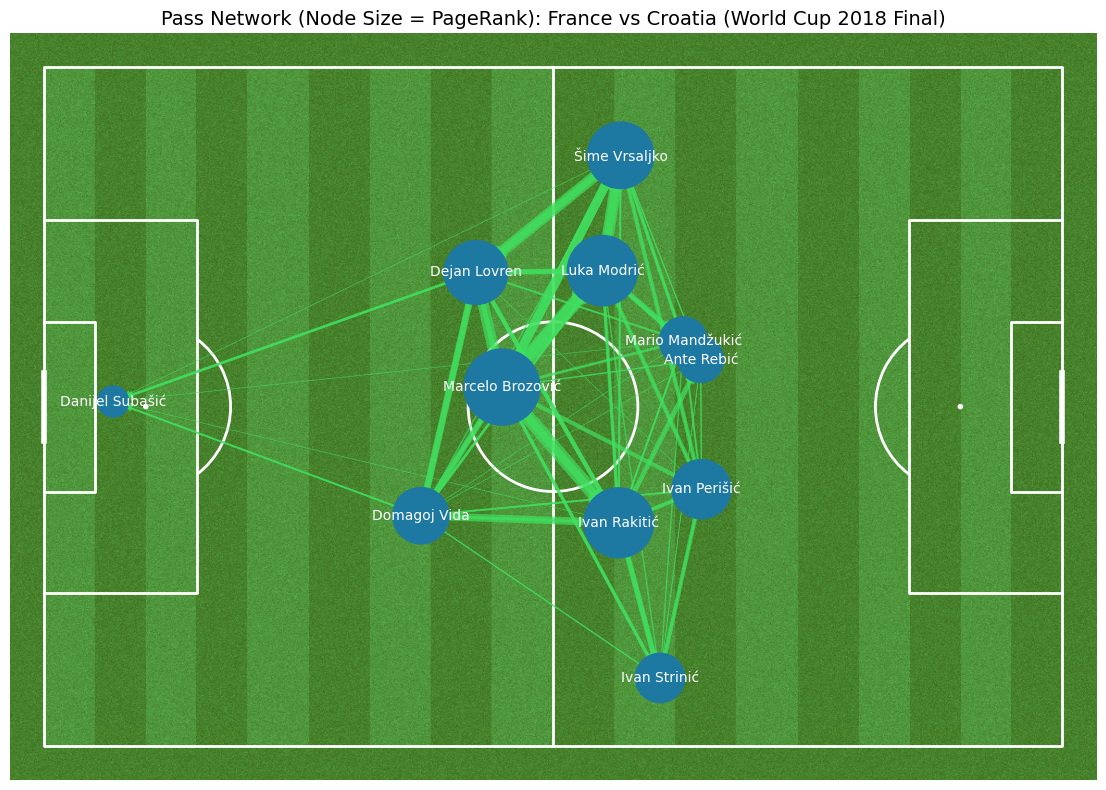

In [17]:
# Normalize PageRank scores for node sizing
import numpy as np

# Define visual range for node sizes (in points²)
min_size = 500
max_size = 3000

# Extract scores as array for normalization
scores = np.array(list(pagerank_scores.values()))
min_score, max_score = scores.min(), scores.max()

# Avoid division by zero (if all scores are equal, use a constant size)
if max_score - min_score == 0:
    pagerank_scaled = {player: (min_size + max_size) / 2 for player in pagerank_scores}
else:
    pagerank_scaled = {
        player: min_size + (score - min_score) / (max_score - min_score) * (max_size - min_size)
        for player, score in pagerank_scores.items()
    }

# Create list of node sizes for plotting
node_sizes = [pagerank_scaled[player] for player in G.nodes]

# Draw pitch
fig, ax = pitch.draw(figsize=(12, 8))

# Draw nodes with PageRank-based sizes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="#1d79a2", ax=ax)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="#FFFFFF", ax=ax)

# Draw edges based on pass count
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[data['weight'] * 0.5 for _, _, data in edges],
    alpha=0.7,
    edge_color='#40e060',
    arrows=True,
    ax=ax
)

# Final touches
plt.title('Pass Network (Node Size = PageRank): France vs Croatia (World Cup 2018 Final)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


### Conclution

- Players located with their avg position
- PageRank calculated and used for nodes sizes with normalization(it shows their importance in pass chain)
- - Hubs and Authorities(Brozovic,Modric,Rakitic) -- Authorities would get many incoming links from hubs
- Edges weighted according to pass event count

# Community Detection

https://kateto.net/netscix2016.html

A number of algorithms aim to detect groups that consist of densely connected nodes with fewer connections across groups.

Community detection based on edge betweenness (Newman-Girvan)
High-betweenness edges are removed sequentially (recalculating at each step) and the best partitioning of the network is selected

### girvan_newman

C:\Users\user\AppData\Local\Temp\ipykernel_14456\2279198342.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_communities)


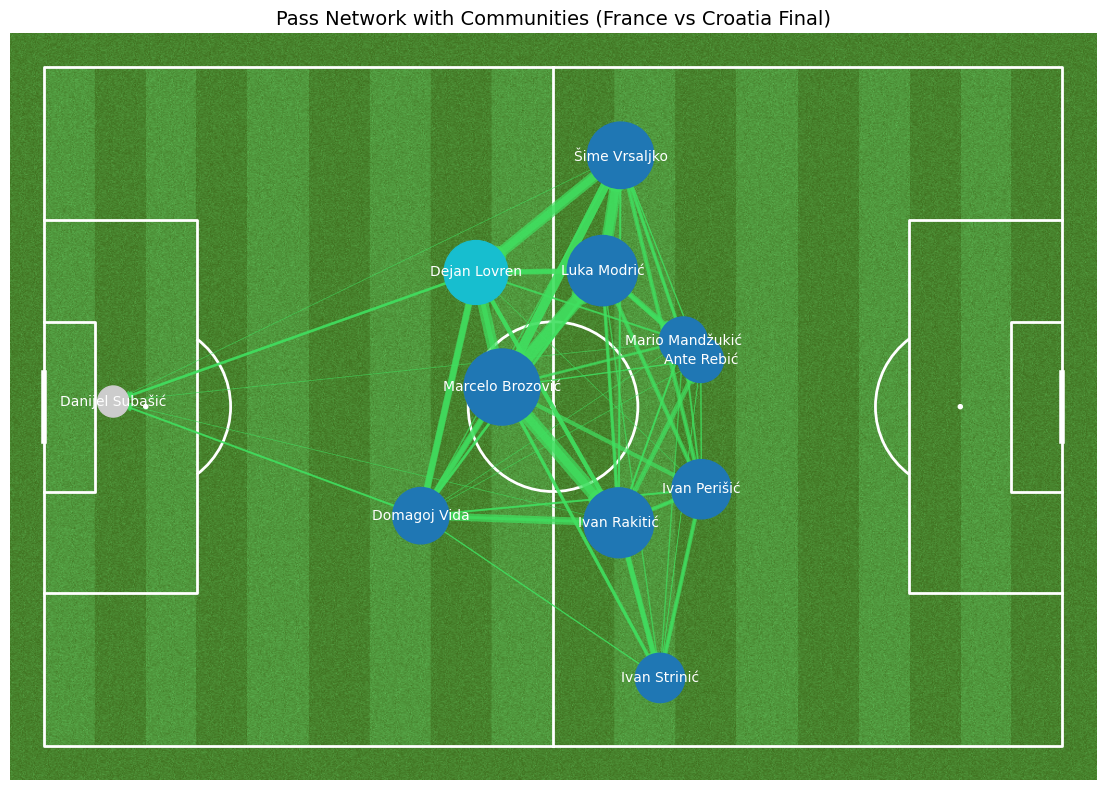

Community 1: ['Luka Modrić', 'Ivan Strinić', 'Ivan Rakitić', 'Ante Rebić', 'Mario Mandžukić', 'Marcelo Brozović', 'Šime Vrsaljko', 'Domagoj Vida', 'Ivan Perišić']
Community 2: ['Dejan Lovren']


In [21]:
from networkx.algorithms.community import girvan_newman
import itertools
import matplotlib.cm as cm

# Identify the goalkeeper
goalkeeper_name = "Danijel Subašić"  # Adjust this if name varies in dataset

# Create a subgraph excluding the goalkeeper
players_for_community = [node for node in G.nodes if node != goalkeeper_name]
G_sub = G.subgraph(players_for_community).copy()

# Run Girvan-Newman on the subgraph
communities_generator = girvan_newman(G_sub)
top_level_communities = next(communities_generator)
community_list = [list(community) for community in top_level_communities]

# Assign community index to each player in the subgraph
node_community_map = {}
for idx, community in enumerate(community_list):
    for player in community:
        node_community_map[player] = idx

# Add goalkeeper back, but assign a neutral or unique color/index
node_community_map[goalkeeper_name] = -1  # Assign special group

# Generate colors for all communities (including goalkeeper as separate)
num_communities = len(community_list)
colors = cm.get_cmap('tab10', num_communities)

# Define colors for each node
node_colors = [
    colors(node_community_map[node]) if node_community_map[node] != -1 else "#cccccc"
    for node in G.nodes
]

# Final Plot: Community Detection + PageRank Sizes
fig, ax = pitch.draw(figsize=(12, 8))

# Draw nodes with PageRank-based sizes and community-based colors
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    ax=ax
)

nx.draw_networkx_labels(G, pos, font_size=10, font_color="#FFFFFF", ax=ax)

# Draw edges with width based on pass counts
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[data['weight'] * 0.5 for _, _, data in edges],
    alpha=0.7,
    edge_color='#40e060',
    arrows=True,
    ax=ax
)

plt.title('Pass Network with Communities (France vs Croatia Final)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

for idx, community in enumerate(community_list):
    print(f"Community {idx + 1}: {community}")


### greedy_modularity_communities

C:\Users\user\AppData\Local\Temp\ipykernel_14456\3436169445.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_communities)


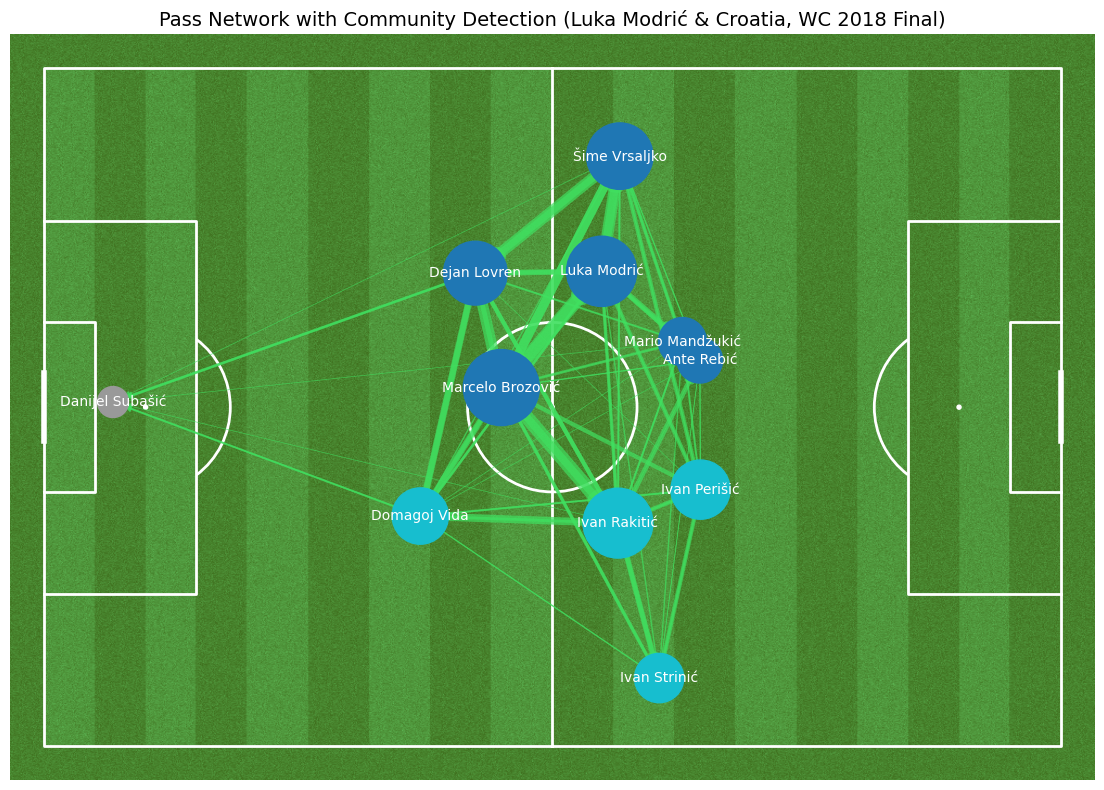

In [25]:
from networkx.algorithms.community import greedy_modularity_communities
# --- Community detection (exclude GK) ---
goalkeeper_name = "Danijel Subašić"
G_undirected = G.to_undirected()
players_no_gk = [node for node in G_undirected.nodes if node != goalkeeper_name]
G_no_gk = G_undirected.subgraph(players_no_gk).copy()

# Apply greedy modularity community detection
communities = greedy_modularity_communities(G_no_gk, weight='weight')

# Map community index
node_community_map = {}
for idx, community in enumerate(communities):
    for player in community:
        node_community_map[player] = idx
node_community_map[goalkeeper_name] = -1  # GK as neutral

# Generate color map
num_communities = len(communities)
colors = cm.get_cmap('tab10', num_communities)
node_colors = [
    colors(node_community_map[node]) if node_community_map[node] != -1 else "#999999"
    for node in G.nodes
]

# --- Draw pitch and network ---
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="#FFFFFF", ax=ax)

edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[data['weight'] * 0.5 for _, _, data in edges],
    alpha=0.7,
    edge_color='#40e060',
    arrows=True,
    ax=ax
)

plt.title('Pass Network with Community Detection (Luka Modrić & Croatia, WC 2018 Final)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

https://chatgpt.com/c/6817e861-fbec-800d-ab32-0200c4a5db23

In [35]:
edges

OutEdgeDataView([('Mario Mandžukić', 'Marcelo Brozović', {'weight': 4}), ('Mario Mandžukić', 'Ante Rebić', {'weight': 3}), ('Mario Mandžukić', 'Ivan Rakitić', {'weight': 3}), ('Mario Mandžukić', 'Ivan Perišić', {'weight': 3}), ('Mario Mandžukić', 'Dejan Lovren', {'weight': 1}), ('Mario Mandžukić', 'Luka Modrić', {'weight': 4}), ('Mario Mandžukić', 'Šime Vrsaljko', {'weight': 3}), ('Marcelo Brozović', 'Luka Modrić', {'weight': 20}), ('Marcelo Brozović', 'Ivan Perišić', {'weight': 6}), ('Marcelo Brozović', 'Ivan Strinić', {'weight': 5}), ('Marcelo Brozović', 'Domagoj Vida', {'weight': 9}), ('Marcelo Brozović', 'Ivan Rakitić', {'weight': 20}), ('Marcelo Brozović', 'Dejan Lovren', {'weight': 7}), ('Marcelo Brozović', 'Šime Vrsaljko', {'weight': 13}), ('Marcelo Brozović', 'Ante Rebić', {'weight': 2}), ('Marcelo Brozović', 'Mario Mandžukić', {'weight': 1}), ('Marcelo Brozović', 'Andrej Kramarić', {'weight': 4}), ('Luka Modrić', 'Šime Vrsaljko', {'weight': 17}), ('Luka Modrić', 'Domagoj Vida'

In [22]:
p = passes[['player','pass_recipient','pass_end_location']]
p[(p['player']=='Mario Mandžukić')& (p['pass_recipient']=='Marcelo Brozović') ]

player    pass_recipient pass_end_location
6    Mario Mandžukić  Marcelo Brozović      [50.0, 42.0]
147  Mario Mandžukić  Marcelo Brozović      [52.0, 42.0]
202  Mario Mandžukić  Marcelo Brozović      [50.0, 41.0]
529  Mario Mandžukić  Marcelo Brozović      [50.0, 40.0]

In [26]:
print(f"Total passes {p[(p['player']=='Mario Mandžukić') ].shape[0]}")
p[(p['player']=='Mario Mandžukić') ]

Total passes 21


player    pass_recipient pass_end_location
6    Mario Mandžukić  Marcelo Brozović      [50.0, 42.0]
44   Mario Mandžukić        Ante Rebić      [68.0, 28.0]
147  Mario Mandžukić  Marcelo Brozović      [52.0, 42.0]
170  Mario Mandžukić      Ivan Rakitić      [51.0, 28.0]
202  Mario Mandžukić  Marcelo Brozović      [50.0, 41.0]
233  Mario Mandžukić      Ivan Rakitić     [108.0, 29.0]
267  Mario Mandžukić      Ivan Perišić      [67.0, 44.0]
270  Mario Mandžukić      Dejan Lovren     [108.0, 45.0]
296  Mario Mandžukić      Ivan Rakitić      [56.0, 48.0]
300  Mario Mandžukić      Ivan Perišić      [93.0, 78.0]
313  Mario Mandžukić        Ante Rebić     [117.0, 73.0]
417  Mario Mandžukić       Luka Modrić      [65.0, 50.0]
509  Mario Mandžukić     Šime Vrsaljko      [44.0, 59.0]
519  Mario Mandžukić        Ante Rebić      [79.0, 45.0]
529  Mario Mandžukić  Marcelo Brozović      [50.0, 40.0]
564  Mario Mandžukić     Šime Vrsaljko      [85.0, 78.0]
617  Mario Mandžukić      Ivan Perišić      [86.0, 76.0]
664  Mario Mandžukić     Šime Vrsaljko      [56.0, 71.0]
667  Mario Mandžukić       Luka Modrić      [70.0, 46.0]
733  Mario Mandžukić       Luka Modrić      [85.0, 49.0]
828  Mario Mandžukić       Luka Modrić      [55.0, 59.0]

In [21]:
for a, b, data in edges:
    if a == 'Mario Mandžukić':
        print(a,b,data['weight'])

Mario Mandžukić Marcelo Brozović 4
Mario Mandžukić Ante Rebić 3
Mario Mandžukić Ivan Rakitić 3
Mario Mandžukić Ivan Perišić 3
Mario Mandžukić Dejan Lovren 1
Mario Mandžukić Luka Modrić 4
Mario Mandžukić Šime Vrsaljko 3


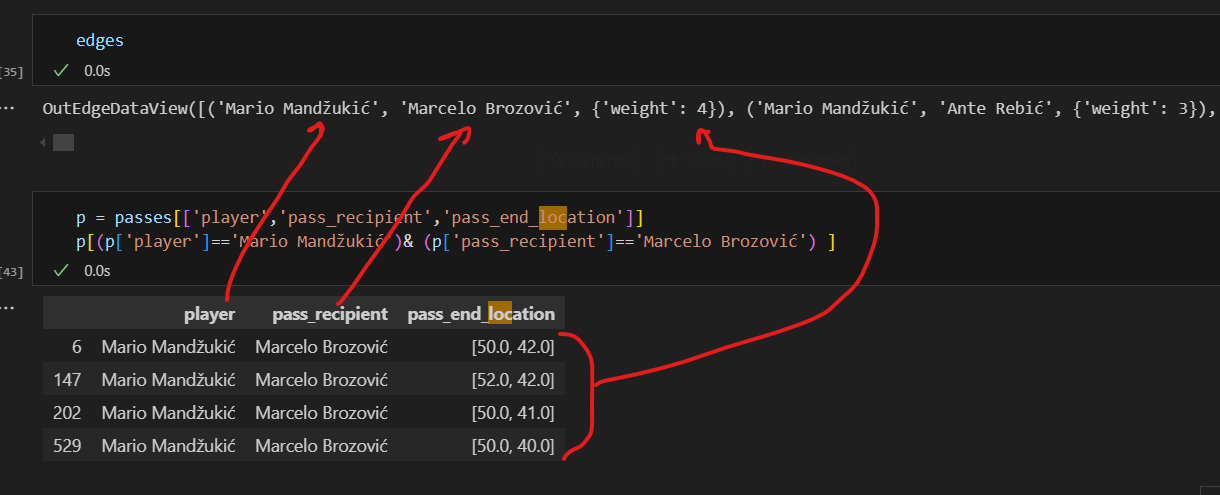

her pas yazılmıs 